# Analysing EEG data

### Downloading data

In [1]:
!wget https://physionet.org/static/published-projects/eegmat/eeg-during-mental-arithmetic-tasks-1.0.0.zip

--2024-07-04 12:35:35--  https://physionet.org/static/published-projects/eegmat/eeg-during-mental-arithmetic-tasks-1.0.0.zip
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 183634285 (175M) [application/zip]
Saving to: 'eeg-during-mental-arithmetic-tasks-1.0.0.zip'

eeg-during-mental-a 100%[===================>] 175.13M   383KB/s    in 6m 44s  

2024-07-04 12:42:19 (444 KB/s) - 'eeg-during-mental-arithmetic-tasks-1.0.0.zip' saved [183634285/183634285]



In [2]:
!unzip eeg-during-mental-arithmetic-tasks-1.0.0.zip

Archive:  eeg-during-mental-arithmetic-tasks-1.0.0.zip
 extracting: eeg-during-mental-arithmetic-tasks-1.0.0/Subject29_2.edf  
 extracting: eeg-during-mental-arithmetic-tasks-1.0.0/Subject24_1.edf  
 extracting: eeg-during-mental-arithmetic-tasks-1.0.0/Subject12_2.edf  
 extracting: eeg-during-mental-arithmetic-tasks-1.0.0/Subject02_2.edf  
 extracting: eeg-during-mental-arithmetic-tasks-1.0.0/Subject15_1.edf  
 extracting: eeg-during-mental-arithmetic-tasks-1.0.0/Subject16_1.edf  
 extracting: eeg-during-mental-arithmetic-tasks-1.0.0/Subject08_1.edf  
 extracting: eeg-during-mental-arithmetic-tasks-1.0.0/SHA256SUMS.txt  
 extracting: eeg-during-mental-arithmetic-tasks-1.0.0/Subject34_2.edf  
 extracting: eeg-during-mental-arithmetic-tasks-1.0.0/Subject32_1.edf  
 extracting: eeg-during-mental-arithmetic-tasks-1.0.0/Subject18_1.edf  
 extracting: eeg-during-mental-arithmetic-tasks-1.0.0/Subject27_1.edf  
 extracting: eeg-during-mental-arithmetic-tasks-1.0.0/Subject17_1.edf  
 extractin

In [17]:
import numpy as np
import mne
import matplotlib.pyplot as plt

### Loading the '.edf' file for subject 14 during rest and during arithmetic calculation.

In [34]:
#Choosing a random .edf file to base our analysis on
file_path1 = 'eeg-during-mental-arithmetic-tasks-1.0.0/Subject14_1.edf'
file_path2 = 'eeg-during-mental-arithmetic-tasks-1.0.0/Subject14_2.edf'

raw1 = mne.io.read_raw_edf(file_path1, preload=True)
raw2 = mne.io.read_raw_edf(file_path2, preload=True)

Extracting EDF parameters from /kaggle/working/eeg-during-mental-arithmetic-tasks-1.0.0/Subject14_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /kaggle/working/eeg-during-mental-arithmetic-tasks-1.0.0/Subject14_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


In [36]:
raw1.info

Measurement date,"January 01, 2010 00:00:00 GMT"
Experimenter,Unknown
Participant,6
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [37]:
raw2.info

Measurement date,"January 01, 2010 00:00:00 GMT"
Experimenter,Unknown
Participant,6
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


### Plotting signal for raw1.

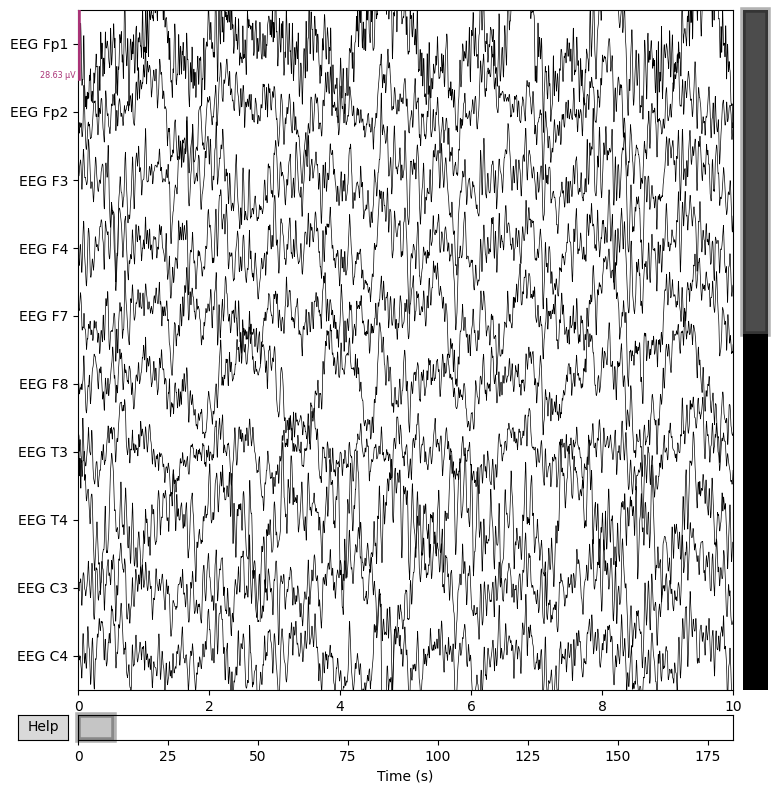

In [27]:
#Plotting the first 10 channels of the signal.
raw1.plot(n_channels=10, scalings='auto', show=True)

### PSD Graph before and during arithmetic activity.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_33/917511619.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw1.plot_psd(fmin=1., fmax=100., show=True)
/tmp/ipykernel_33/917511619.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw1.plot_psd(fmin=1., fmax=100., show=True)


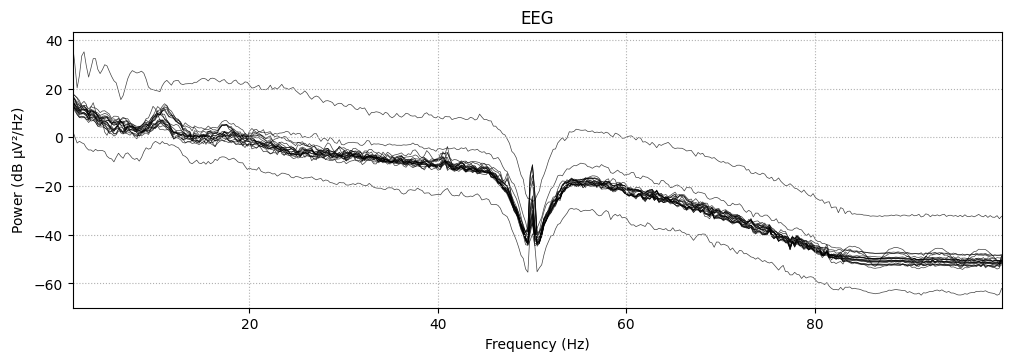

In [32]:
#Plotting the psd for frequencies between 1 and 100 hz.
#Before arithmetic operation.
raw1.plot_psd(fmin=1., fmax=100., show=True)

#### We notice that we have high psd for smaller frequencies and low for higher frequencies.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_33/2870849842.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw2.plot_psd(fmin=1., fmax=100., show=True)
/tmp/ipykernel_33/2870849842.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw2.plot_psd(fmin=1., fmax=100., show=True)


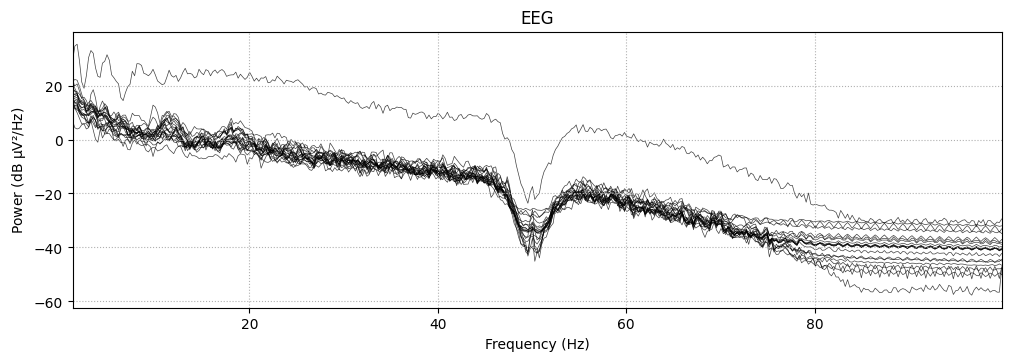

In [33]:
#During arithmetic operation.
raw2.plot_psd(fmin=1., fmax=100., show=True)